In [2]:
%pylab inline

import pandas as pd
import seaborn as sns
sns.set()
import pickle
from sklearn.neighbors import KNeighborsClassifier , RadiusNeighborsClassifier
from sklearn.model_selection import train_test_split , cross_val_score, StratifiedShuffleSplit
from sklearn.preprocessing import StandardScaler, PolynomialFeatures, OneHotEncoder
from sklearn import metrics

Populating the interactive namespace from numpy and matplotlib


In [3]:
with open('atxac_de.pickle', 'rb') as read_aacde:
    atxac_df = pickle.load(read_aacde)

In [43]:
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=88 )
for train_index, test_index in split.split(atxac_df, atxac_df['Updated_Outcome_Type']):
    strat_train_set = atxac_df.loc[train_index]
    strat_test_set = atxac_df.loc[test_index]

In [44]:
X_train = strat_train_set.drop(columns=['Outcome_Type','Updated_Outcome_Type'])
y_train = strat_train_set['Updated_Outcome_Type']
X_test = strat_test_set.drop(columns=['Outcome_Type','Updated_Outcome_Type'])
y_test = strat_test_set['Updated_Outcome_Type']

In [4]:
X = atxac_df.drop(columns=['Outcome_Type','Updated_Outcome_Type'])
y = atxac_df['Updated_Outcome_Type']

In [20]:
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=.2, random_state=88,stratify=y)

In [21]:
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=.25, random_state=24,stratify=y_train_val)

In [38]:
y_pred

array(['Transfer', 'Adoption', 'Transfer', ..., 'Transfer', 'Transfer',
       'Adoption'], dtype=object)

In [48]:
X_train.shape

(30768, 25)

In [49]:
X_val.shape

(10257, 25)

In [ ]:
"""['Intake_Type', 'Intake_Condition', 'Sex_Upon_Outcome', 'OutcomeBreed','OutcomeColor','TimeSinceIntake','AgeYrs','No_Known_Owner']"""
#'Outcome_Type'
#'Outcome_Subtype'
# 'Outcome_Age','Outcome_Animal_Type'

In [ ]:
#Stand. - 'AgeYrs' , 'TimeSinceIntake'
#
#OHE - 'Sex_Upon_Outcome', 'OutcomeBreed' , 'OutcomeColor','Intake_Type','Intake_Condition'

In [23]:
atxac_df['Intake_Type'].value_counts(dropna=False)

Stray                 38114
Owner Surrender       11354
Public Assist          1223
NaN                     426
Abandoned                98
Euthanasia Request       67
Name: Intake_Type, dtype: int64

In [50]:
ohe = OneHotEncoder(handle_unknown='ignore')
ohe.fit(X_train[['Sex_Upon_Outcome','OutcomeBreed']])
suo = ohe.transform(X_train[['Sex_Upon_Outcome','OutcomeBreed']]).toarray()

In [51]:
suo.shape

(30768, 91)

In [52]:
knn = KNeighborsClassifier()
knn.fit(suo,y_train)

KNeighborsClassifier()

In [53]:
suo_val = ohe.transform(X_val[['Sex_Upon_Outcome','OutcomeBreed']]).toarray()

In [54]:
suo_val.shape

(10257, 91)

In [55]:
y_pred = knn.predict(suo_val)
metrics.accuracy_score(y_val,y_pred)

0.7478794969289266

In [63]:
from sklearn.metrics import confusion_matrix
print("kNN confusion matrix: \n\n", confusion_matrix(y_val, y_pred,labels=['Adoption','Transfer','Other']))

kNN confusion matrix: 

 [[4638  223   13]
 [1183 3019   16]
 [ 653  498   14]]


<AxesSubplot:>

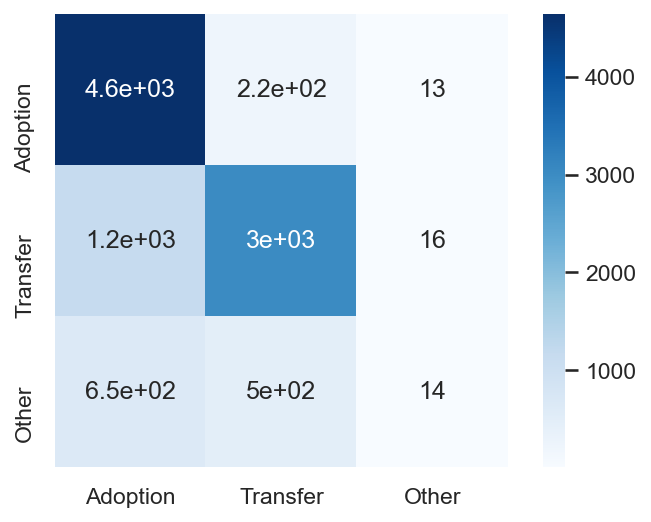

In [61]:
knn_confusion = confusion_matrix(y_val, y_pred,labels=['Adoption','Transfer','Other'])
plt.figure(dpi=150)
sns.heatmap(knn_confusion, cmap=plt.cm.Blues, annot=True, square=True, xticklabels=['Adoption','Transfer','Other'],
           yticklabels=['Adoption','Transfer','Other'])